In [1]:
import sys
import os
import tensorflow as tf
import keras
from PIL import Image
import warnings
import pandas as pd
from glob import glob
import numpy as np
import cv2
from keras import backend as K
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline

warnings.filterwarnings("ignore")
sys.path.insert(0, '../utils/')
from data import *
from model import get_dense_model

Using TensorFlow backend.


# Loading model with necessary parameters

In [2]:
img_width, img_height = 112, 112
channel = 3
lr = 1e-3
num_classes = 5
model = get_dense_model(num_classes, img_width, img_height, channel, lr)
model.load_weights('../weights/reproduce.hdf5')

# Getting test image list and randomly selecting 9 images

In [3]:
files = glob('../patches/test/*/*')
files = shuffle(files)
img_indices = np.random.choice(len(files),9).astype(np.uint8)

# Loading up images and their labels

In [4]:
img_label = [files[img].split('/')[-2] for img in img_indices]
img_list = [cv2.imread(files[img]) for img in img_indices]
img_list = [cv2.resize(img,(img_width, img_height)) for img in img_list]
print(img_label)

['two', 'one', 'two', 'two', 'one', 'one', 'two', 'one', 'one']


# Predicting cell types 

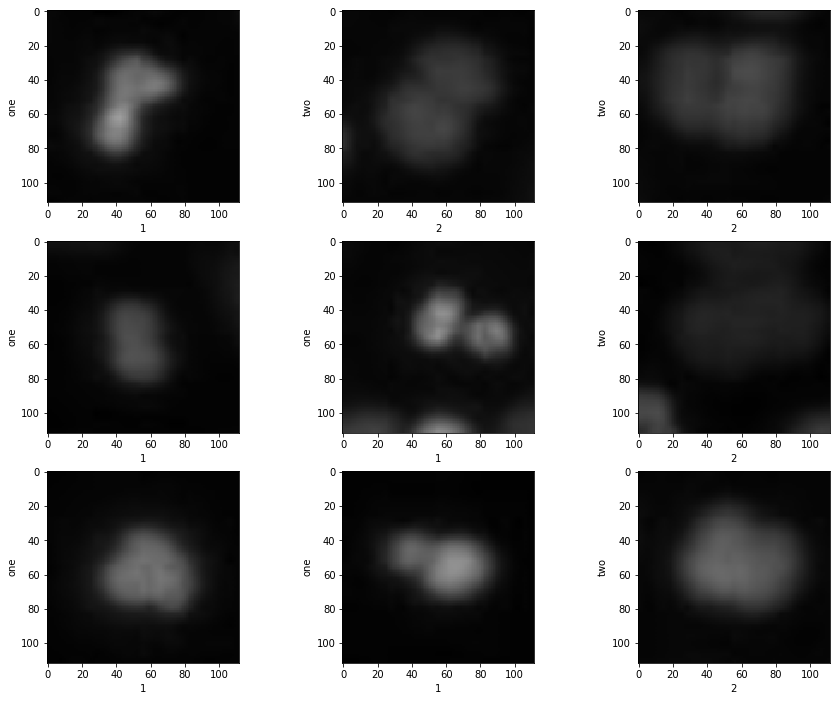

X-axis is Predicted label and Y-axis is ground truth label


In [5]:
plt.figure(figsize=(15,12))

for i in range(9):
    img = img_list[i]
    img = np.expand_dims(img,axis=0)
    pred = model.predict(img)
    pred = np.argmax(pred,axis=1)[0]
    plt.subplot('33{}'.format(i))
    plt.imshow(img[0])
    plt.xlabel(pred)
    plt.ylabel(img_label[i])
plt.show()

print('X-axis is Predicted label and Y-axis is ground truth label')
